# Group Proposal


**Authors:** Bryan Chang, Linda Huang, Jade Jordan, Inan Latif

**Group:** 5

## Preliminary Results


In [1]:
library(tidyverse)
library(datateachr)
library(repr)
library(digest)
library(infer)
library(grid)
library(gridExtra)
library(taxyvr)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Raw Data:

In [2]:
dataset <- read_csv("crime_data_2021.csv", show_col_types = FALSE)
head(dataset)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2021,11,21,6,33,10XX ALBERNI ST,West End,491015.9,5459166
Break and Enter Commercial,2021,11,26,13,58,10XX BARCLAY ST,West End,490833.8,5458887
Break and Enter Commercial,2021,12,14,2,2,10XX BEACH AVE,Central Business District,490252.4,5458163
Break and Enter Commercial,2021,7,17,5,0,10XX BEACH AVE,Central Business District,490255.4,5458159
Break and Enter Commercial,2021,6,15,4,0,10XX BEACH AVE,Central Business District,490258.4,5458155
Break and Enter Commercial,2021,7,23,6,12,10XX BEACH AVE,Central Business District,490269.9,5458141


In [3]:
#Reading data into R, and renaming all columns to a standard format
crime_data <- 
    read.csv("crime_data_2021.csv") %>%  
    setNames(c("type",
               "year",
               "month",
               "day",
               "hour",
               "minute",
               "hundred_block",
               "neighbourhood",
               "x",
               "y"))

head(crime_data)

,type,year,month,day,hour,minute,hundred_block,neighbourhood,x,y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Break and Enter Commercial,2021,11,21,6,33,10XX ALBERNI ST,West End,491015.9,5459166
2,Break and Enter Commercial,2021,11,26,13,58,10XX BARCLAY ST,West End,490833.8,5458887
3,Break and Enter Commercial,2021,12,14,2,2,10XX BEACH AVE,Central Business District,490252.4,5458163
4,Break and Enter Commercial,2021,7,17,5,0,10XX BEACH AVE,Central Business District,490255.4,5458159
5,Break and Enter Commercial,2021,6,15,4,0,10XX BEACH AVE,Central Business District,490258.4,5458155
6,Break and Enter Commercial,2021,7,23,6,12,10XX BEACH AVE,Central Business District,490269.9,5458141


## Data Description: Related Columns
**Categoric Variables:**
  
 Neighbourhood (24 levels):  Arbutus Ridge, Central Business District, Dunbar-Southlands, Renfrew Collingwood, Riley Park,  Shaughnessy, Fairview, Grandview-Woodland, Hastings-Sunrise, Kensington-Cedar Cottage, Kerrisdale, Killarney, Kitsilano, Marpole, Mount Pleasant, Musqueam, Oakridge, South Cambie, Stanley Park, Strathcona, Sunset, Victoria-Fraserview, West End, West Point Grey

**Quantitative Variables:**
  
  Day: Based on number of the day for the year (2021)  

  Month: Ranges from month in a year from 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

  Hours: The specific hour in the day ranging from 0-23


## Cleaning Data

In [4]:
#filtering out type and minute column
crime_select <- crime_data %>% select(-year, -minute, -x, -y, -hundred_block)

#renaming hundred_block to a more human readable format
days_by_m <- c(0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334)
clean_crime <- crime_select %>%
                mutate(day = day + days_by_m[month]) %>%
                filter(type == "Theft of Bicycle")
head(clean_crime)
nrow(clean_crime)

,type,month,day,hour,neighbourhood
,<chr>,<int>,<dbl>,<int>,<chr>
1,Theft of Bicycle,11,305,1,West End
2,Theft of Bicycle,7,187,18,West End
3,Theft of Bicycle,8,224,19,Central Business District
4,Theft of Bicycle,7,201,19,Central Business District
5,Theft of Bicycle,7,204,6,Central Business District
6,Theft of Bicycle,9,246,2,West End


[1] 1460

,neighbourhood,day
,<chr>,<dbl>
1,West End,305
2,West End,187
3,Central Business District,224
4,Central Business District,201
5,Central Business District,204
6,West End,246


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



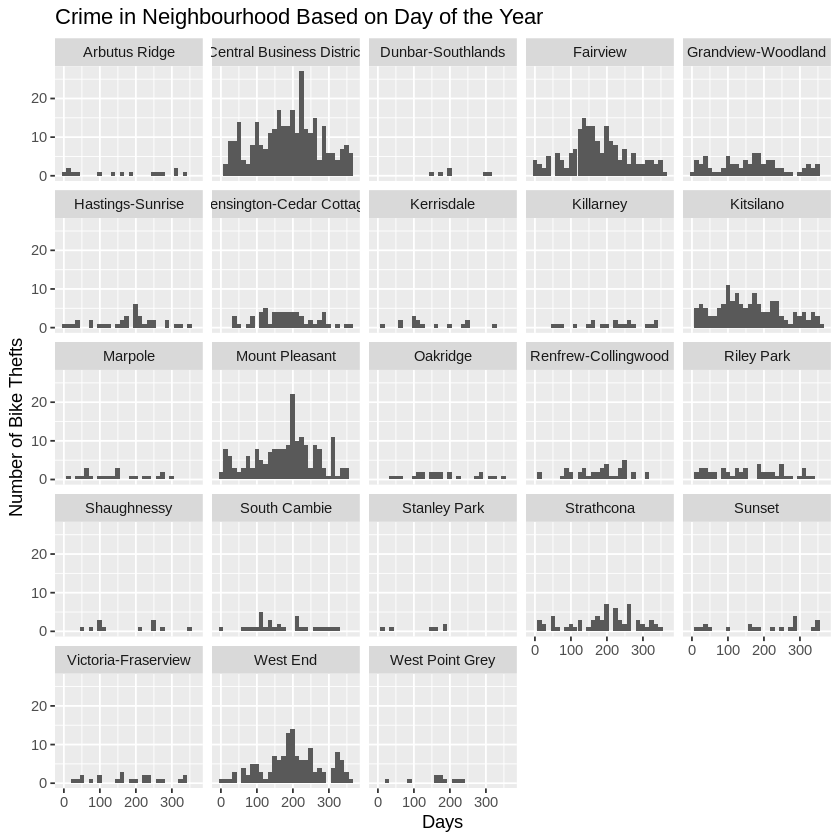

In [5]:
crime_neighbourhood_day <- clean_crime %>%
                           select(neighbourhood,day)

head(crime_neighbourhood_day)

crime_neighbourhood_day_hist <- crime_neighbourhood_day %>%
ggplot(aes(x = day)) +
geom_histogram()+
ggtitle("Crime in Neighbourhood Based on Day of the Year") +
labs(x = "Days", y = "Number of Bike Thefts") +
facet_wrap(~ neighbourhood)
crime_neighbourhood_day_hist

,neighbourhood,hour
,<chr>,<int>
1,West End,1
2,West End,18
3,Central Business District,19
4,Central Business District,19
5,Central Business District,6
6,West End,2


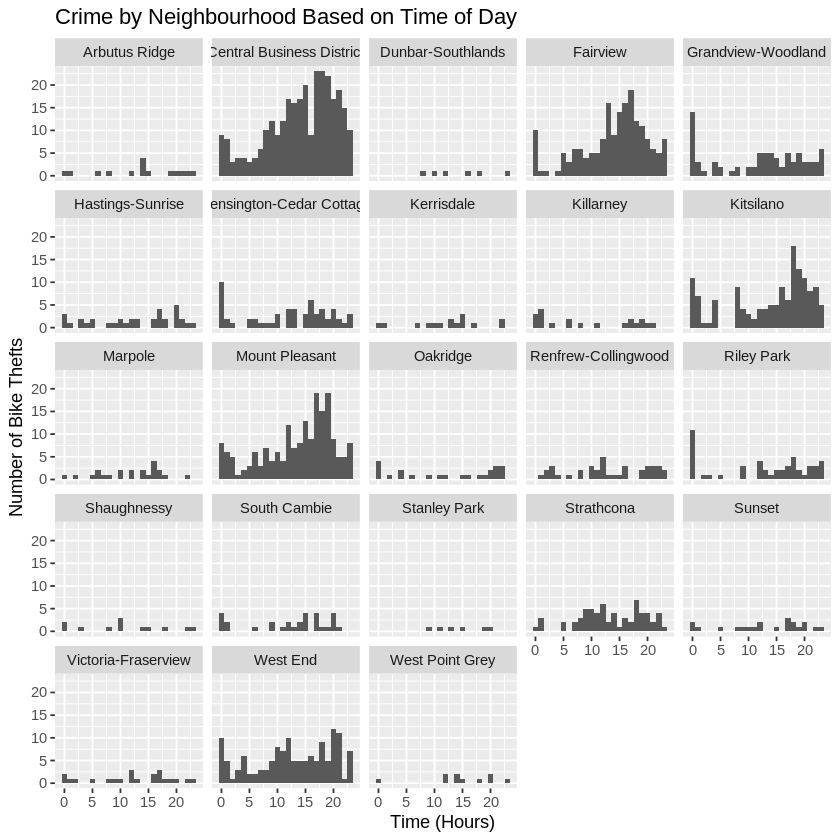

In [6]:
crime_neighbourhood_hour <- clean_crime %>%
                           select(neighbourhood,hour)
head(crime_neighbourhood_hour)

crime_neighbourhood_hour_hist <- crime_neighbourhood_hour %>%
                                 ggplot(aes(x = hour)) +
                                 geom_histogram(bins = 24)+
                                 ggtitle("Crime by Neighbourhood Based on Time of Day") +
                                 labs(x = "Time (Hours)", y = "Number of Bike Thefts") +
                                 facet_wrap(~ neighbourhood)
crime_neighbourhood_hour_hist

#### Preliminary Graphs

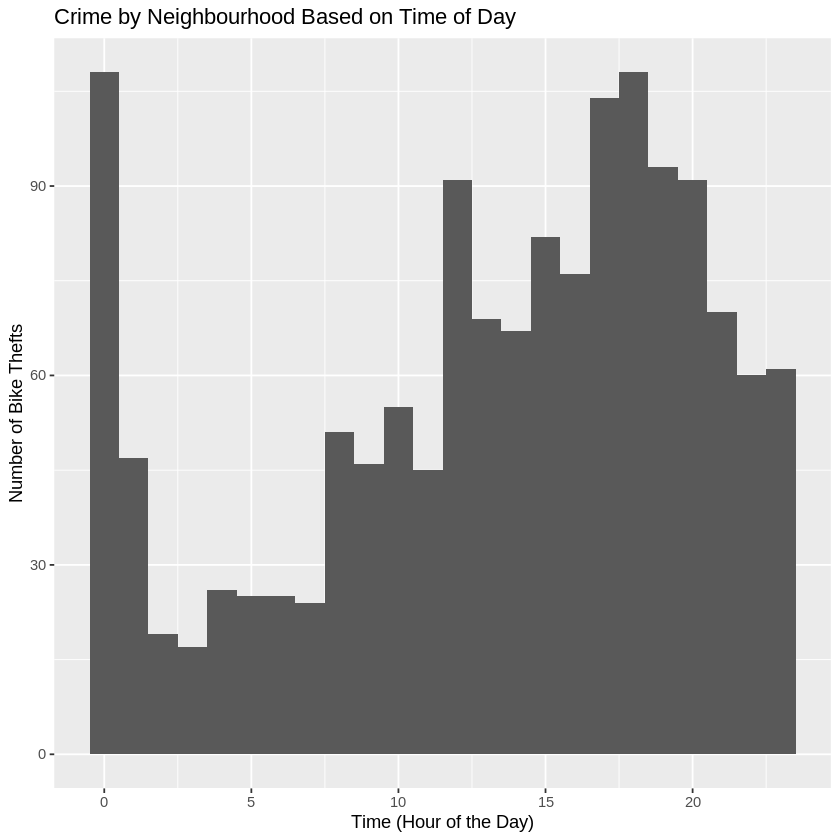

In [7]:
#generating sample
set.seed(1234) 

raw_hist_hour <- clean_crime %>%
                                 ggplot(aes(x = hour)) +
                                 geom_histogram(bins = 24)+
                                 ggtitle("Crime by Neighbourhood Based on Time of Day") +
                                 labs(x = "Time (Hour of the Day)", y = "Number of Bike Thefts")

raw_hist_hour

In [8]:
# adding new column to our data which shows whether the crime has occurred during daytime or nighttime
# create a new column "Time of Day" with two levels ("Day", "Night"), append to clean_crime data frame
day_night <- c(8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
clean_crime_day_night <- clean_crime %>%
                        summarise(time_of_day = ifelse(hour %in% day_night, "day", "night"))
clean_crime_new <- data.frame(clean_crime, clean_crime_day_night)
head(clean_crime_new)

,type,month,day,hour,neighbourhood,time_of_day
,<chr>,<int>,<dbl>,<int>,<chr>,<chr>
1,Theft of Bicycle,11,305,1,West End,night
2,Theft of Bicycle,7,187,18,West End,day
3,Theft of Bicycle,8,224,19,Central Business District,day
4,Theft of Bicycle,7,201,19,Central Business District,day
5,Theft of Bicycle,7,204,6,Central Business District,night
6,Theft of Bicycle,9,246,2,West End,night


### INSERT HYPOTHESES HERE, MAYBE? idk im thinking maybe further up, but we'll see
# blank line hehe

In [9]:
# this will give us counts of bike thefts during the day and night in the cleaned data set
clean_crime_count <- clean_crime_new %>%
                        group_by(time_of_day) %>%
                        summarise(count = n())
head(clean_crime_count)

# test statistic is going to be a ratio between the counts of daytime bike thefts to nighttime bike thefts
obs_test_ratio <- clean_crime_count$count[1] / clean_crime_count$count[2]
obs_test_ratio

time_of_day,count
<chr>,<int>
day,887
night,573


[1] 1.547993

In [10]:
# Generate the bootstrap sampling distribution
# had to modify for the statistic so that we got the ratio between daytime and nighttime theft for each rep
set.seed(4321)
bootstrap_day <- clean_crime_new %>%
                         specify(response = time_of_day, success = c("day")) %>%
                         generate(type = "bootstrap", reps = 100) %>% 
                         calculate(stat = "count")
bootstrap_new <- bootstrap_day %>%
                        mutate(day_count = stat,
                               night_count = 1460 - stat,
                              ratio = day_count / night_count) %>%
                        select(-stat)
head(bootstrap_new)

replicate,day_count,night_count,ratio
<int>,<int>,<dbl>,<dbl>
1,877,583,1.504288
2,893,567,1.574956
3,915,545,1.678899
4,915,545,1.678899
5,864,596,1.449664
6,877,583,1.504288


In [11]:
# create a null model centered about a ratio of 1:1
bye_bye <- mean(bootstrap_new$ratio) - 1
bootstrap_null <- bootstrap_new %>%
                mutate(stat = ratio - bye_bye)
head(bootstrap_null)

replicate,day_count,night_count,ratio,stat
<int>,<int>,<dbl>,<dbl>,<dbl>
1,877,583,1.504288,0.9507601
2,893,567,1.574956,1.0214278
3,915,545,1.678899,1.1253710
4,915,545,1.678899,1.1253710
5,864,596,1.449664,0.8961363
6,877,583,1.504288,0.9507601


#### P-value and Confidence Intervals:

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


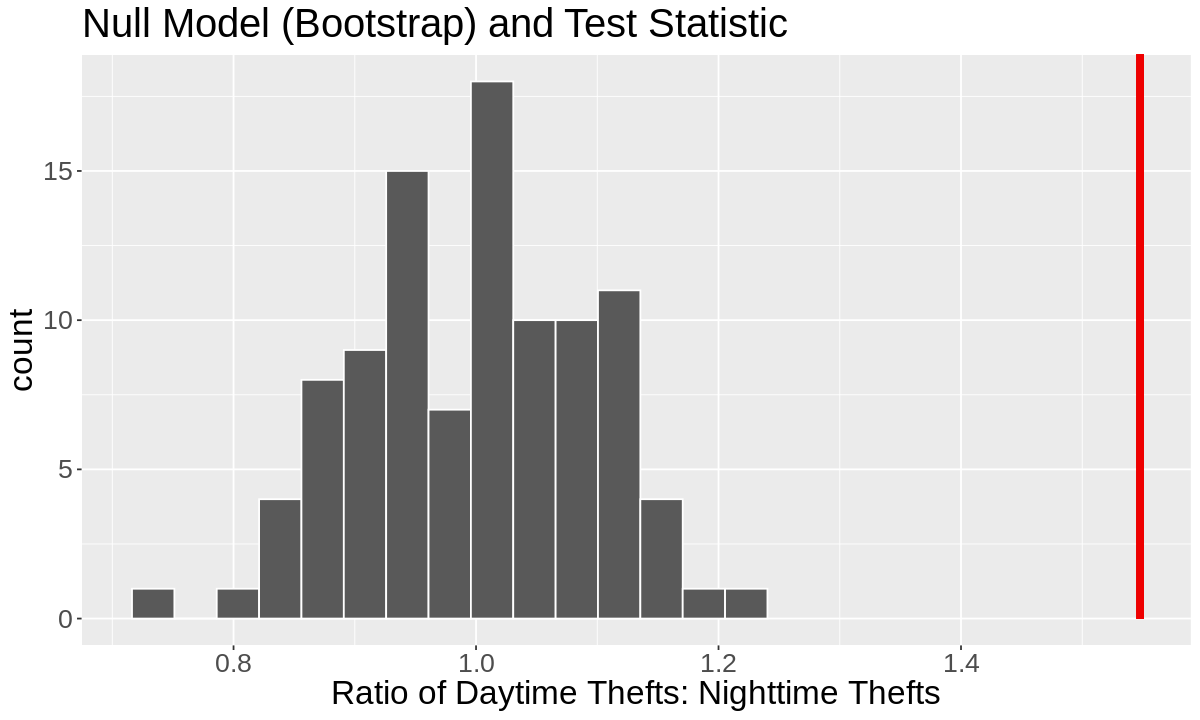

In [12]:
# Compute p value
p_value_bike = get_p_value(bootstrap_null, obs_stat = obs_test_ratio, direction = "greater")

p_value_bike

# Visualize the null model with the test statistic and shade the critical/rejection region 
options(repr.plot.width = 10, repr.plot.height = 6)
bike_null_plot <- bootstrap_null %>%
                    visualize() + 
                    shade_p_value(obs_stat = obs_test_ratio, direction = "greater")+
                    theme(text = element_text(size = 20)) +
                    xlab("Ratio of Daytime Thefts: Nighttime Thefts") +
                    ggtitle("Null Model (Bootstrap) and Test Statistic")
bike_null_plot

In [13]:
# Compute the corresponding 95% confidence interval 
ci_0.95 <- bootstrap_null %>%
                    get_confidence_interval(level = 0.95)
ci_0.95

lower_ci,upper_ci
<dbl>,<dbl>
0.8417813,1.152809


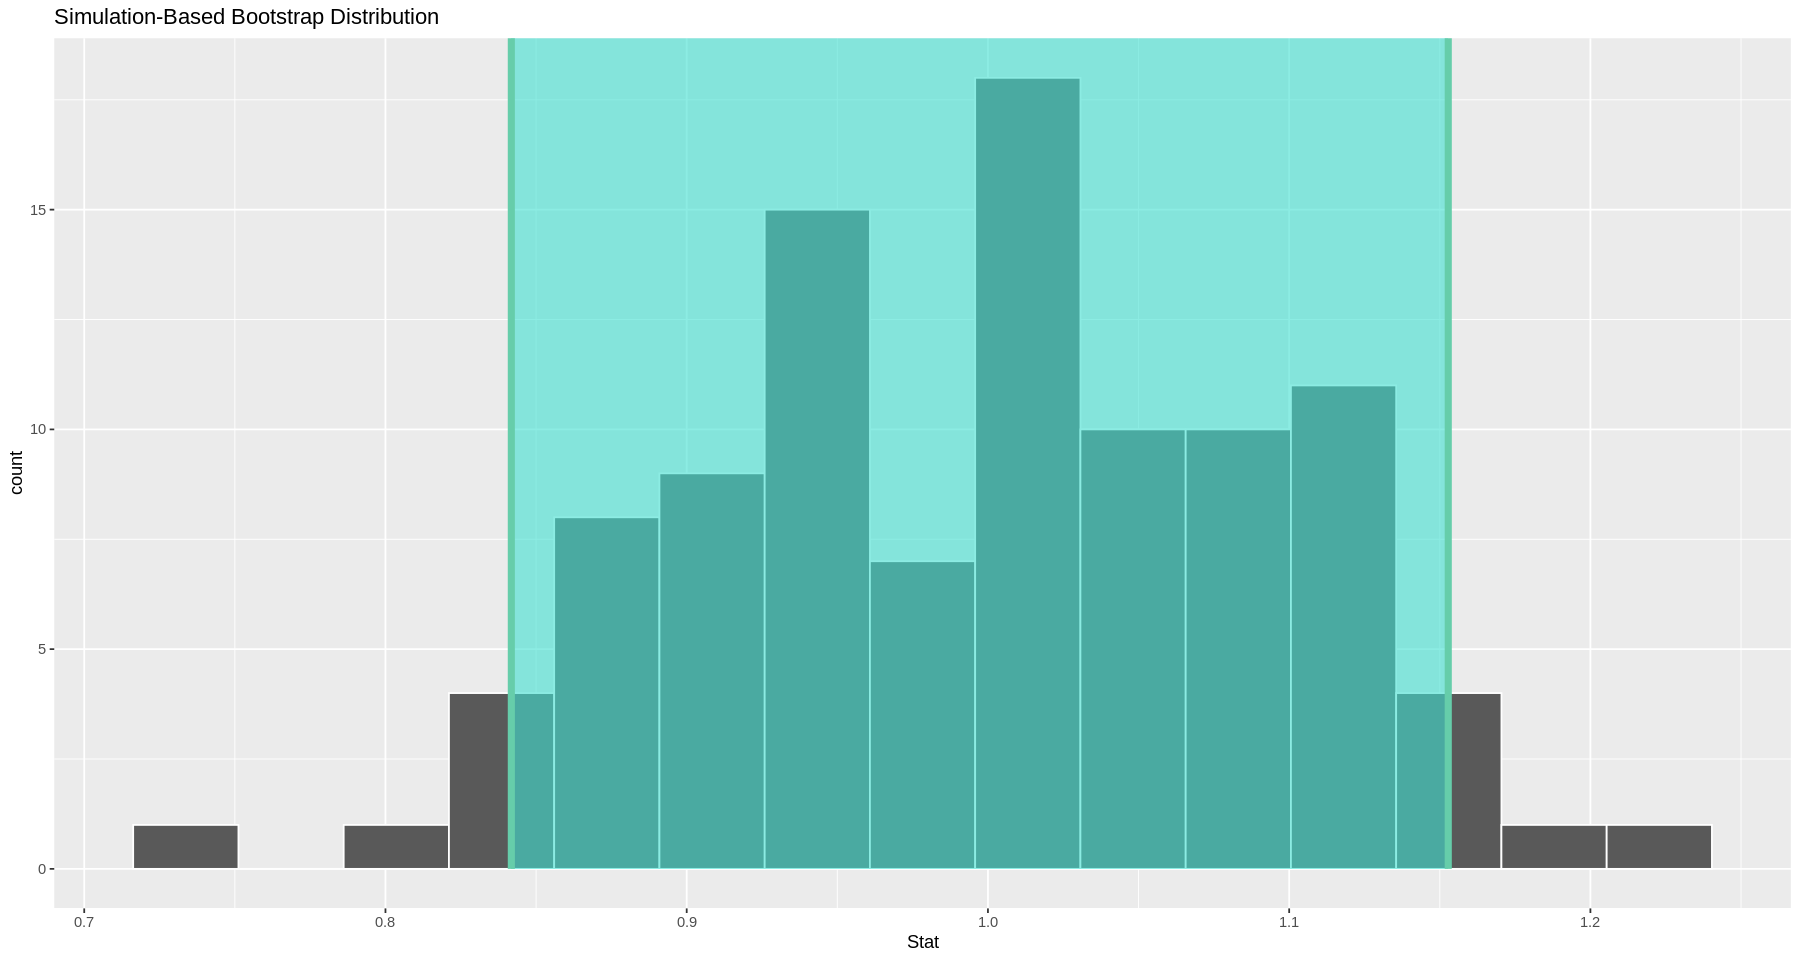

In [14]:
# Visualize bootstrap sampling distribution of ratio with shaded 95% confidence interval
options(repr.plot.width = 15, repr.plot.height = 8)
shaded_ci <- bootstrap_null %>%
                    visualize(bins = 15)+
                    shade_confidence_interval(endpoints = ci_0.95)+
                    labs(x = "Stat")
shaded_ci

We are 95% confident that this interval contains the INSERT IMPLICATION HERE

For this study, we believe asymptotics is more appropriate than bootstrapping. The dataset has shown us, the average number of bike thefts does not show significant variation across "day" time hours. In particular, the interval of $8$ to $19$ has a higher bike theft rate, but it does not differ too extremely. Due to this if we performed bootstrapping, the duplicated data would accumulate, and become more concentrated, resulting in more prevelant error.

## References
APA or MLA might work better
